In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Y ban dau: ', y_train)
print('Y sau: ', Y_train)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'sigmoid'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
H = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 10, verbose = 1)

11490434/11490434 [==============================] - 1s 0us/step
(50000, 28, 28)
Y ban dau:  [5 0 4 ... 8 4 8]
Y sau:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.2803 - accuracy: 0.9188 - val_loss: 0.0691 - val_accuracy: 0.9809
Epoch 2/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.0255 - accuracy: 0.9930 - val_loss: 0.0400 - val_accuracy: 0.9891
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0411 - val_accuracy: 0

{'loss': [0.2803103029727936, 0.0595078282058239, 0.03801283612847328, 0.02548700012266636, 0.01596394181251526, 0.011468775570392609, 0.006938284263014793, 0.00564599921926856, 0.004723287187516689, 0.0030931124929338694], 'accuracy': [0.9187600016593933, 0.9833199977874756, 0.9892600178718567, 0.9930199980735779, 0.9953600168228149, 0.9968400001525879, 0.9984599947929382, 0.9985799789428711, 0.9987800121307373, 0.9993399977684021], 'val_loss': [0.06912459433078766, 0.04867017641663551, 0.04745751991868019, 0.039966095238924026, 0.041104938834905624, 0.03702253848314285, 0.037875156849622726, 0.04015190526843071, 0.038493916392326355, 0.03928519785404205], 'val_accuracy': [0.98089998960495, 0.9860000014305115, 0.9866999983787537, 0.9890999794006348, 0.988099992275238, 0.9894999861717224, 0.989300012588501, 0.988099992275238, 0.9898999929428101, 0.9896000027656555]}
[0.032720960676670074, 0.989300012588501]


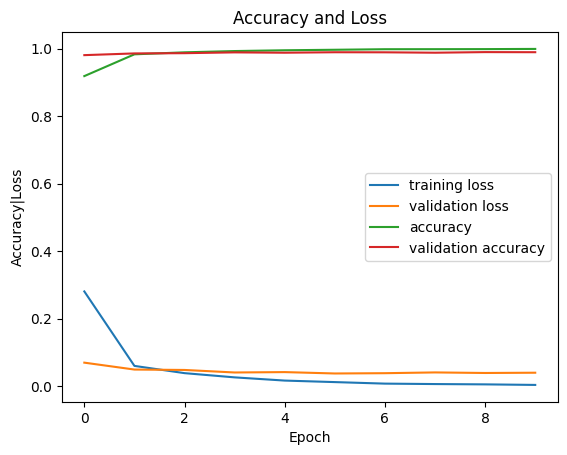

In [4]:
fig = plt.figure()
numOfEpoch = 10
print(H.history)
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label = 'training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label = 'accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy|Loss')
plt.legend()
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)

1/1 [==============================] - 0s 109ms/step
Gia tri du doan:  5


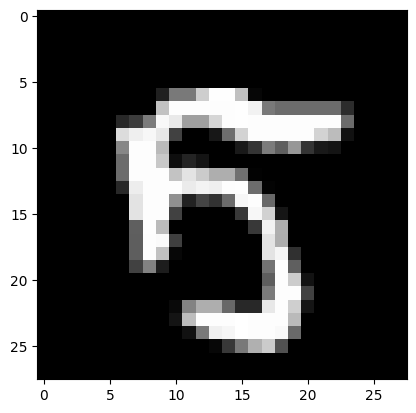

In [5]:
a = 2001

plt.imshow(X_test[a].reshape(28, 28), cmap = 'gray')
y_predict = model.predict(X_test[a].reshape(1, 28, 28, 1))
print('Gia tri du doan: ', np.argmax(y_predict))